<img src="Images/HSP2.png" />
This Jupyter Notebook Copyright 2017 by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2017 by RESPEC INC. and released under this [License](LegalInformation/License.txt)

# TUTORIAL 5: $\textbf{HSP}^\textbf{2}$  Plotting and Reporting

## Introduction

This tutorial will cover how to make publication quality plots and create reports from the HDF5 simulation data.

**Tutorial Contents**

 + Section 1: [Plotting](#section1)
 + Section 2: [Reports](#section2)
 + Section 3: [Using Pandas for Reports](#section3)

### Required Python imports

In [43]:
import os
import site
site.addsitedir(os.getcwd().rsplit('\\',1)[0] + '\\')  # adds your path to the HSP2 software.

hdfname = 'TutorialData/tutorial.h5'

import shutil
import numpy as np
import pandas as pd
pd.options.display.max_rows    = 18
pd.options.display.max_columns = 10
pd.options.display.float_format = '{:.2f}'.format  # display 2 digits after the decimal point

from matplotlib import pyplot as plt
%matplotlib inline

import HSP2
import HSP2tools

HSP2tools.reset_tutorial()    # make a new copy of the tutorial's data
HSP2tools.versions()          # display version information below

,Version
HSP2,0.7.7
HSP2tools,0.7.6
,
PYTHON,"2.7.14 |Anaconda custom (64-bit)| (default, Oc..."
IPYTHON,5.4.1
,
H5PY,2.7.0
MATPLOTLIB,2.1.0
NETWORKX,2.0
NUMBA,0.35.0+10.g143f70e.dirty


## Section 1: Plotting<a id='section1'></a>

It is easy to make professional quality plots. Pandas uses the matplotlib  library under the hood which provides essentially all the plot
options in MATLAB (2-d only).

The calculated VOLEV timeseries from Reach 1 and Reach 5 will be used to demonstrate the concepts.

**NOTE** When a user specifies saving a calculated timeseries (this will be shown later), the entire timeseries is saved at the timestep of the simulation. This allows resampling at convenient timesteps (like days, weeks, months, years) for both plotting and creating written reports.  Timeseries that are needed for inputs to other modules are automatically saved. The remaining timeseries are only saved when specified by the user.

In [2]:
HSP2.run(hdfname, saveall=True)  # make sure the computed results are available

2018-01-10 12:11:43.79   Run Started for file TutorialData/tutorial.h5
2018-01-10 12:11:43.88     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2018-01-10 12:11:44.21   Finished setup
2018-01-10 12:11:44.22      PERLND P001   DELT=60
2018-01-10 12:11:47.72      RCHRES R001   DELT=60
2018-01-10 12:11:51.84      RCHRES R002   DELT=60
2018-01-10 12:11:55.70      RCHRES R003   DELT=60
2018-01-10 12:11:55.72      RCHRES R004   DELT=60
2018-01-10 12:11:55.77      IMPLND I001   DELT=60
2018-01-10 12:11:56.34      RCHRES R005   DELT=60
2018-01-10 12:11:56.39   Run completed
Run time is 0:00:12.636000


#### Read the VOLEV data from the tutorial HDF5 file for segments '1' and '5'

In [3]:
df1 = pd.read_hdf(hdfname, '/RESULTS/RCHRES_R001/HYDR')['VOLEV']
df5 = pd.read_hdf(hdfname, '/RESULTS/RCHRES_R005/HYDR')['VOLEV']

Display the first few values to see that the timeseries is as expected and is hourly (Freq is H for hourly).

**NOTE** the function **head()** used below is just a simple method to display the first few lines of data. The function **tail()** similarly shows the last few data items.  Either function can take an integer argument to specify the number of lines to display.

In [4]:
df1.head()

1976-01-01 00:00:00   0.00
1976-01-01 01:00:00   0.00
1976-01-01 02:00:00   0.00
1976-01-01 03:00:00   0.00
1976-01-01 04:00:00   0.00
Freq: 60T, Name: VOLEV, dtype: float32

#### Make a simple plot.

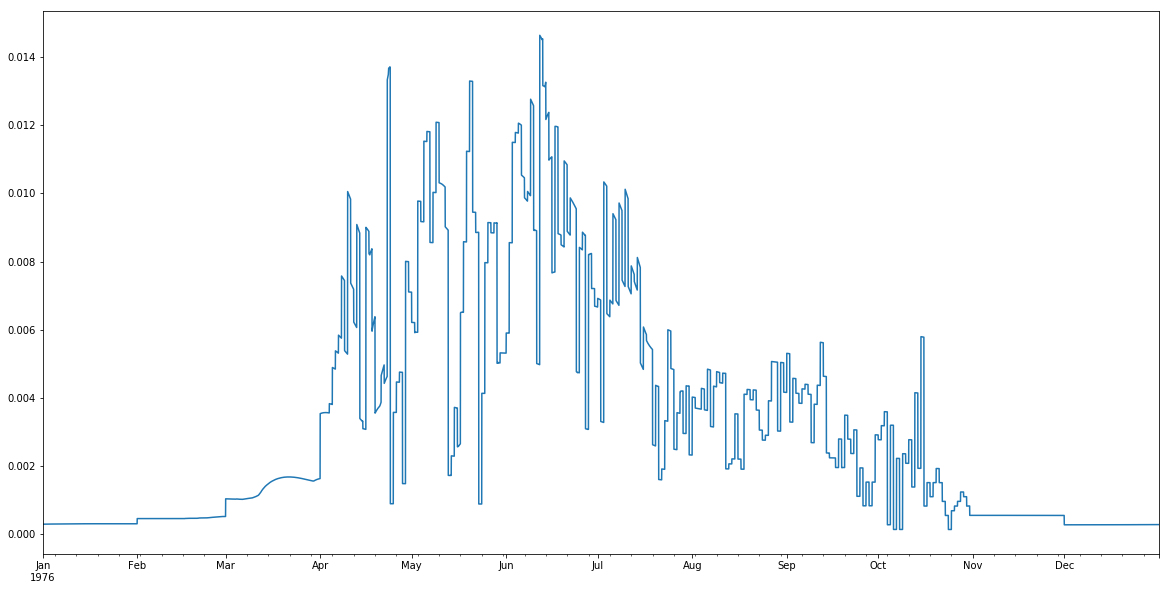

In [5]:
df1.plot(figsize=[20, 10])

This is a pretty messy plot, but works easily.

Now aggregate the data into daily time intervals and select the evaporation sum for each day for a cleaner plot.

**Note** The aggregation method is "sum" which adds up all the values falling into the new time interval.

In [9]:
df1_dailysum = df1.resample('D').sum()
df1_dailysum.head(10)

1976-01-01   0.01
1976-01-02   0.01
1976-01-03   0.01
1976-01-04   0.01
1976-01-05   0.01
1976-01-06   0.01
1976-01-07   0.01
1976-01-08   0.01
1976-01-09   0.01
1976-01-10   0.01
Freq: D, Name: VOLEV, dtype: float32

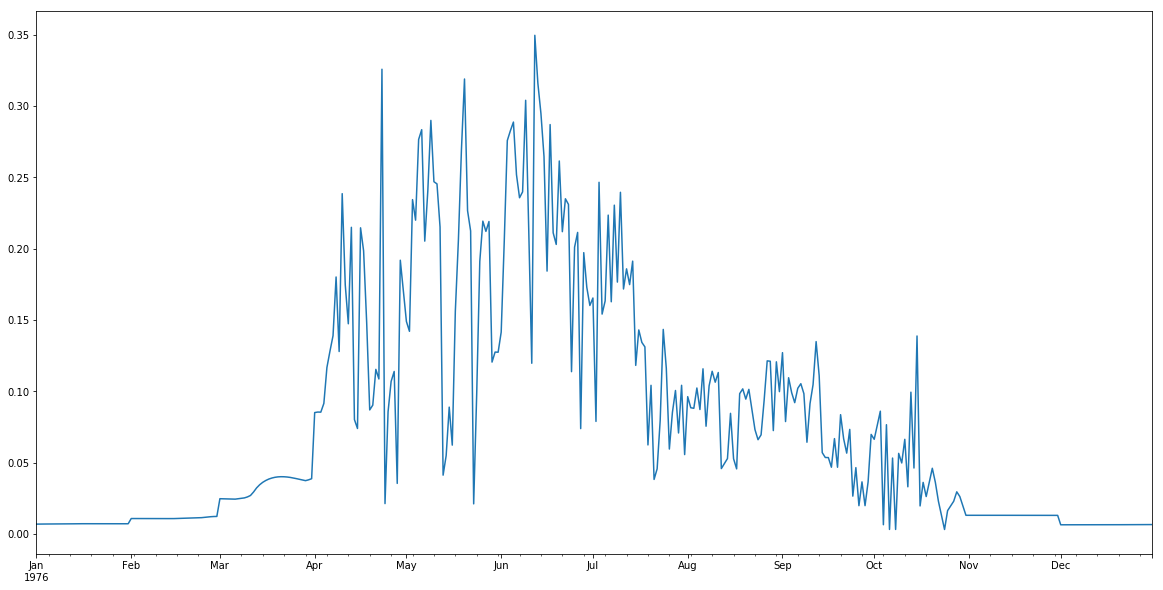

In [10]:
df1_dailysum.plot(figsize=[20, 10])

#### Maybe a weekly aggregation is less messy, but still shows the data well.

In [12]:
df1_weeklysum = df1.resample('W').sum()
df1_weeklysum

1976-01-04   0.03
1976-01-11   0.05
1976-01-18   0.05
1976-01-25   0.05
1976-02-01   0.05
1976-02-08   0.08
1976-02-15   0.08
1976-02-22   0.08
1976-02-29   0.08
             ... 
1976-11-07   0.09
1976-11-14   0.09
1976-11-21   0.09
1976-11-28   0.09
1976-12-05   0.06
1976-12-12   0.05
1976-12-19   0.05
1976-12-26   0.05
1977-01-02   0.03
Freq: W-SUN, Name: VOLEV, Length: 53, dtype: float32

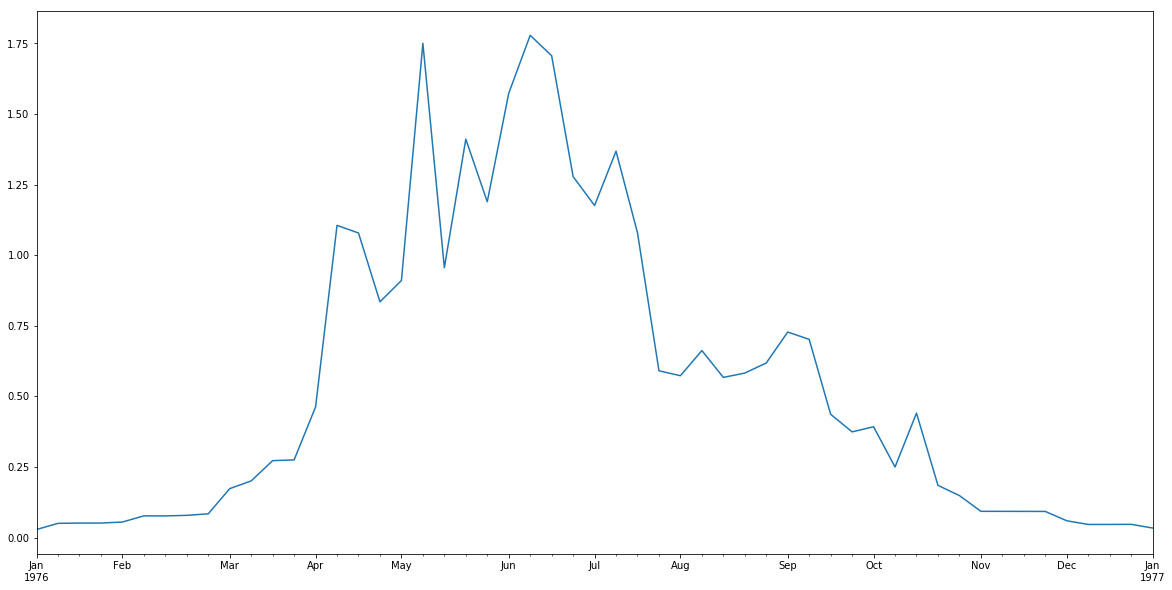

In [13]:
df1_weeklysum.plot(figsize=[20, 10])

#### OK, better. Now do this for the REACH 5 timeseries.

In [15]:
df5_weeklysum = df5.resample('W').sum()
df5_weeklysum

1976-01-04   0.00
1976-01-11   0.02
1976-01-18   0.01
1976-01-25   0.01
1976-02-01   0.01
1976-02-08   0.02
1976-02-15   0.02
1976-02-22   0.02
1976-02-29   0.02
             ... 
1976-11-07   0.00
1976-11-14   0.00
1976-11-21   0.00
1976-11-28   0.00
1976-12-05   0.00
1976-12-12   0.00
1976-12-19   0.01
1976-12-26   0.00
1977-01-02   0.00
Freq: W-SUN, Name: VOLEV, Length: 53, dtype: float32

#### Make a plot using both timeseries with labels and legend

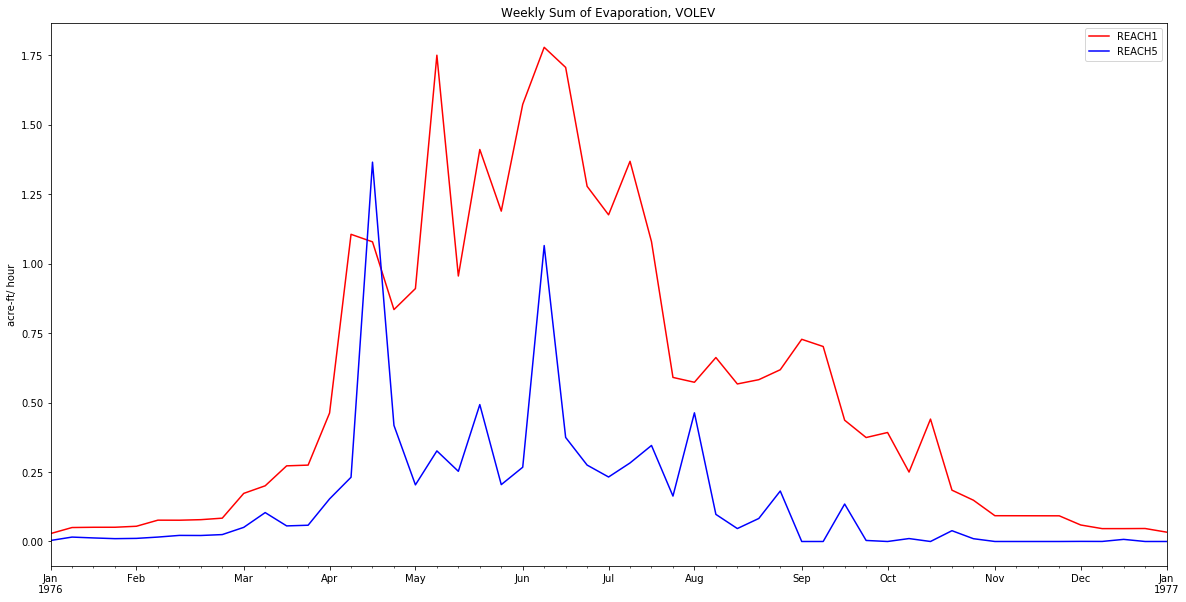

In [16]:
df1_weeklysum.plot(style='red',  label='REACH1', figsize=[20, 10]) 
df5_weeklysum.plot(style='blue', label='REACH5')
plt.title('Weekly Sum of Evaporation, VOLEV')    # can set titles
plt.ylabel('acre-ft/ hour')                      # can set axis labels
plt.legend(loc='best')                           # make a legend

# demonstrate saving the plots to files in various format
plt.savefig('tutorial5.png')
plt.savefig('tutorial5.pdf')
plt.savefig('tutorial5.tiff')
plt.savefig('tutorial5.svg')

Pandas plot() makes prettier time axis than matplotlib directly, but you can use matplotlib routines for other the options like legends and titles.

The matplotlib library generally has every option that MATLAB has for 2-d plotting with similar names and arguments. This makes it easy to generate publication quality plots.

You can open the PNG, PDF, TIFF, and SVG files in the TutorialsData directory and view them with your viewing tools.

### Some background on interactive plotting

There is very active development going on to visualize "big" data (including plotting) interactively. This is being driven by big science and also by "Quants", Quantitative Analysts and Data Scientists (new fields) seeking to process a lot of data fast and visualize it quickly in order to make stock market or trading decisions.
These development projects all rely  on advanced HTML 5 features. Different browsers have different levels of compliance to HTML 5, so sometimes some tool features break on any specific browser.

Some links to a very few of the many interesting projects:
    
 + [D3](http://d3js.org/) This is the great grand daddy of these efforts. the weird looking display of hexagons are selected examples. Click on one and see it demonstrated.
 + [Ipython Vega](https://github.com/vega/ipython-vega) This project is under active development to bring Vega to the Jupyter Notebook.
 + [plotly](https://plot.ly/). This was a commercial product - but recently became free to use.
 + [bokeh](http://bokeh.pydata.org/) Continuum Analytics won a large (3 million dollar) grant from DARPA's XDATA project. It requires all the funded projects to become open source. It is D3 like in look & feel, but very different visualization grammar. Click on one of the images to see it work and to see the code. (Most seem to be interactive examples, but not all.) Well integrated with IPython Notebook.
 + [mpld3](http://mpld3.github.io/)  This project which converts matplotlib calls to D3. 

#### Using Matplotlib to make interactive plots

A feature of the 1.4 matplotlib is the new notebook backend to make it easy to make interactive plots.
Put this in your Python imports and settings cell:

> %matplotlib notebook

instead of 

> %matplotlib inline

Note the tools to pan, zoom, and reset the plot. Hover over a tool icon and a hint will appear to describe that tool. You can zoom into specific hourly data and pan smoothly to any part of the timeseries. Hover your mouse over the plotted data and the time and value are displayed below the plot frame.

When you are done, click on the x in the red box at the upper right corner of the plot which freezes the plot in the current view and exits from the interactive mode in that cell. 

Here is an example using an hourly precpitation time series.

**Note** the Jupyter Notebook is not really good at allowing changes to the matplotlib backend once the Notebook is started. 

Currently, you should not mix backends. But for this tutorial as the last plot, we will try this.

(It might fail. In this case, you need to remove the inline statement near the top of this notebook and replace it with the matplotlib notebook.  Save the notebook and restart the kernel. Then it should work.  Active development is being made to embed the plotting package into the Jupyer Notebook in a way to allow more dynamic changes of the backend.)

<IPython.core.display.Javascript object>


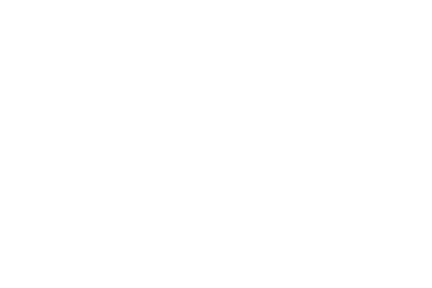

<IPython.core.display.Javascript object>


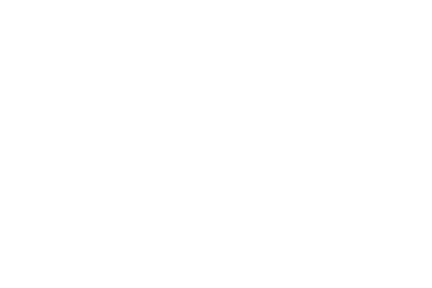

In [17]:
%matplotlib notebook
df1 = pd.read_hdf(hdfname, 'TIMESERIES/TS39')
df1.plot()

**Section Summary**

 + Demonstrated disaggregation of the data from hourly to daily and weekly intervals
 + Demonstrated making plots with
   + multiple timeseries
   + plot Title
   + plot Axis Labels
   + control of line styles (color)
   + Plot legend
 + Demonstrated interactive plotting
 + Demostrated saving plots in a variety of formats
   + SVN
   + PNG
   + PDF
   + TIFF

## Section 2: Reports<a id='section2'></a>

Most of the computed time series datasets are needed for this example. Use the saveall option to insure the necessary data are available.

In [18]:
HSP2.run(hdfname, saveall=True)

2018-01-10 12:14:23.96   Run Started for file TutorialData/tutorial.h5
2018-01-10 12:14:23.99     Start 1976-01-01 00:00    Stop 1976-12-31 23:59
2018-01-10 12:14:24.32   Finished setup
2018-01-10 12:14:24.34      PERLND P001   DELT=60
2018-01-10 12:14:24.43      RCHRES R001   DELT=60
2018-01-10 12:14:24.46      RCHRES R002   DELT=60
2018-01-10 12:14:24.49      RCHRES R003   DELT=60
2018-01-10 12:14:24.52      RCHRES R004   DELT=60
2018-01-10 12:14:24.56      IMPLND I001   DELT=60
2018-01-10 12:14:24.60      RCHRES R005   DELT=60
2018-01-10 12:14:24.65   Run completed
Run time is 0:00:00.718000


### Demonstrate creating report like traditional HSPF

The following is part of HSPF test 10 output.  This tutorial will show how to make a similar report - but covering all months at once.

### PERLND SNOW

In [19]:
snowpath = '/RESULTS/PERLND_P001/SNOW'

#### Snow - State Variables

The following defines the state variables in the order they should occur in the report.

In [20]:
snow_state_variables = ['PACKF', 'PACKW', 'PACKI','PDEPTH','COVINX', 'NEGHTS', 'XLNMLT', 'RDENPF',
 'SKYCLR', 'SNOCOV',  'DULL', 'ALBEDO', 'PAKTMP', 'DEWTMP', 'SNOTMP']

The following reads the entire snow data from the HDF5 file, then selects only the state variables defined above

In [21]:
snowsv = pd.read_hdf(hdfname, snowpath)[snow_state_variables]
snowsv.head()

,PACKF,PACKW,PACKI,PDEPTH,COVINX,...,DULL,ALBEDO,PAKTMP,DEWTMP,SNOTMP
1976-01-01 00:00:00,1.60,0.10,0.20,8.00,0.50,...,376.00,0.60,28.88,25.00,32.00
1976-01-01 01:00:00,1.60,0.10,0.20,8.00,0.50,...,377.00,0.60,28.88,25.00,32.00
1976-01-01 02:00:00,1.60,0.10,0.20,8.00,0.50,...,378.00,0.60,28.65,25.00,32.00
1976-01-01 03:00:00,1.60,0.10,0.20,8.00,0.50,...,379.00,0.60,28.65,25.00,32.00
1976-01-01 04:00:00,1.60,0.10,0.20,8.00,0.50,...,380.00,0.60,28.52,25.00,32.00


Now convert the frequency to "monthly" 

In [23]:
snowsv = snowsv.resample('M').last()
snowsv

,PACKF,PACKW,PACKI,PDEPTH,COVINX,...,DULL,ALBEDO,PAKTMP,DEWTMP,SNOTMP
1976-01-31,0.18,0.00,0.18,0.20,0.50,...,787.50,0.60,29.80,17.00,32.34
1976-02-29,0.01,0.00,0.00,0.05,0.50,...,202.00,0.65,30.62,29.25,32.70
1976-03-31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-04-30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-05-31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-06-30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-07-31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-08-31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-09-30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00
1976-10-31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00


You can see the HSP2 answers for the same simulation test in the table above including the same number of digits.
They following shows how this might print.  The first column could be "prettyed up" to show just the month or month/year as desired.

In [24]:
print snowsv

            PACKF  PACKW  PACKI  PDEPTH  COVINX   ...     DULL  ALBEDO  \
1976-01-31   0.18   0.00   0.18    0.20    0.50   ...   787.50    0.60   
1976-02-29   0.01   0.00   0.00    0.05    0.50   ...   202.00    0.65   
1976-03-31   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-04-30   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-05-31   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-06-30   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-07-31   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-08-31   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-09-30   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-10-31   0.00   0.00   0.00    0.00    0.00   ...     0.00    0.00   
1976-11-30   0.18   0.01   0.15    0.42    0.18   ...    66.00    0.73   
1976-12-31   0.11   0.01   0.11    0.21    0.50   ...   554.50    0.60   

            PAKTMP  DEWTMP  SNOTMP  


You can print directly to a file almost as easily.

In [25]:
with open('TutorialData/print_example.txt', 'w') as f:
    print >>f, snowsv

Open this file with any text editor or view in your [browser](TutorialData/print_example.txt)

#### SNOW - Fluxes

In [26]:
snow_fluxes = ['SNOWF', 'PRAIN', 'SNOWE',  'WYIELD', 'MELT', 'RAINF']

In [27]:
snow_flx = pd.read_hdf(hdfname, snowpath)[snow_fluxes]
snow_flx

,SNOWF,PRAIN,SNOWE,WYIELD,MELT,RAINF
1976-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 01:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 02:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 03:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 04:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 05:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 06:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 07:00:00,0.00,0.00,0.00,0.00,0.00,0.00
1976-01-01 08:00:00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...


Again convert to Monthly frequency

In [30]:
snow_flx = snow_flx.resample('M').sum()
snow_flx

,SNOWF,PRAIN,SNOWE,WYIELD,MELT,RAINF
1976-01-31,0.25,0.00,0.08,1.68,3.76,0.00
1976-02-29,1.91,0.05,0.03,2.11,2.78,1.02
1976-03-31,2.48,0.20,0.04,2.66,2.81,1.41
1976-04-30,0.00,0.00,0.00,0.00,0.00,6.17
1976-05-31,0.00,0.00,0.00,0.00,0.00,3.47
1976-06-30,0.00,0.00,0.00,0.00,0.00,3.91
1976-07-31,0.00,0.00,0.00,0.00,0.00,1.54
1976-08-31,0.00,0.00,0.00,0.00,0.00,0.19
1976-09-30,0.00,0.00,0.00,0.00,0.00,0.61
1976-10-31,0.00,0.00,0.00,0.00,0.00,1.73


### PERLND WATER

#### WATER - State Variables

In [31]:
waterpath = '/RESULTS/PERLND_P001/PWATER'

In [33]:
water_state_variables = ['PERS', 'CEPS', 'SURS', 'UZS', 'IFWS', 'LZS', 'AGWS', 'GWVS', 'INFFAC', 'PETADJ', 'TGWS']
watersv = pd.read_hdf(hdfname, waterpath)[water_state_variables].resample('M').last()
watersv

,PERS,CEPS,SURS,UZS,IFWS,...,AGWS,GWVS,INFFAC,PETADJ,TGWS
1976-01-31,5.81,0.04,0.00,0.19,0.00,...,0.15,0.13,0.82,0.00,0.15
1976-02-29,8.48,0.03,0.00,0.40,0.00,...,0.64,0.60,1.00,0.00,0.64
1976-03-31,10.76,0.00,0.00,0.57,0.00,...,1.20,1.21,1.00,0.50,1.20
1976-04-30,12.62,0.00,0.00,1.59,0.00,...,1.52,1.65,1.00,1.00,1.52
1976-05-31,11.07,0.00,0.00,0.98,0.00,...,1.05,1.17,1.00,1.00,1.05
1976-06-30,8.59,0.00,0.00,0.48,0.00,...,0.76,0.79,1.00,1.00,0.76
1976-07-31,4.50,0.02,0.00,0.12,0.00,...,0.14,0.11,1.00,1.00,0.14
1976-08-31,0.94,0.00,0.00,0.02,0.00,...,0.00,0.00,1.00,1.00,0.00
1976-09-30,0.44,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00
1976-10-31,1.53,0.03,0.00,0.00,0.00,...,0.00,0.00,1.00,0.50,0.00


#### Water - Fluxes (External)

In [35]:
pd.options.display.float_format = '{:.3f}'.format  # display 3 digits after the decimal point

water_fluxes_external = ['SUPY', 'SURO', 'IFWO', 'AGWO',  'PERO','IGWI', 'SURI']
water_flx_external = pd.read_hdf(hdfname, waterpath)[water_fluxes_external].resample('M').sum()
water_flx_external

,SUPY,SURO,IFWO,AGWO,PERO,IGWI,SURI
1976-01-31,1.679,0.001,0.000,0.079,0.080,0.020,1.677
1976-02-29,3.079,0.002,0.003,0.183,0.188,0.075,2.944
1976-03-31,3.873,0.005,0.025,0.972,1.002,0.171,3.699
1976-04-30,6.170,0.010,0.068,1.228,1.306,0.191,5.486
1976-05-31,3.470,0.003,0.014,1.242,1.260,0.114,2.988
1976-06-30,3.910,0.002,0.020,0.706,0.728,0.087,3.115
1976-07-31,1.540,0.000,0.001,0.271,0.272,0.007,0.914
1976-08-31,0.190,0.000,0.000,0.013,0.013,0.000,0.000
1976-09-30,0.610,0.000,0.000,0.000,0.000,0.000,0.185
1976-10-31,1.730,0.000,0.000,0.000,0.000,0.001,1.312


#### Water - Fluxes  (Evapotranspiration)

In [37]:
water_fluxes_ev = ['CEPE', 'UZET',  'LZET', 'AGWET', 'BASET', 'TAET']
water_flx_ev = pd.read_hdf(hdfname, waterpath)[water_fluxes_ev].resample('M').sum()
water_flx_ev

,CEPE,UZET,LZET,AGWET,BASET,TAET
1976-01-31,0.016,0.000,0.000,0.000,0.000,0.016
1976-02-29,0.144,0.001,0.001,0.000,0.000,0.147
1976-03-31,0.201,0.172,0.042,0.008,0.000,0.423
1976-04-30,0.684,1.216,0.743,0.172,0.000,2.814
1976-05-31,0.482,1.735,1.172,0.259,0.000,3.647
1976-06-30,0.795,1.741,2.677,0.362,0.000,5.575
1976-07-31,0.606,0.443,3.888,0.412,0.000,5.349
1976-08-31,0.210,0.108,3.291,0.126,0.000,3.734
1976-09-30,0.425,0.013,0.668,0.000,0.000,1.107
1976-10-31,0.386,0.002,0.247,0.004,0.000,0.639


#### Water - Fluxes  (Internal Fluxes)

In [39]:
water_fluxes_internal =  ['IFWI', 'UZI',  'INFIL', 'PERC',  'LZI', 'AGWI', 'SURI']
water_flx_internal = pd.read_hdf(hdfname, waterpath)[water_fluxes_internal].resample('M').sum()
water_flx_internal

,IFWI,UZI,INFIL,PERC,LZI,AGWI,SURI
1976-01-31,0.000,0.043,1.633,0.000,1.434,0.179,1.677
1976-02-29,0.003,0.211,2.727,0.000,1.978,0.674,2.944
1976-03-31,0.029,0.439,3.225,0.103,1.622,1.536,3.699
1976-04-30,0.066,2.260,3.151,0.024,1.263,1.721,5.486
1976-05-31,0.015,1.126,1.843,0.000,0.701,1.029,2.988
1976-06-30,0.019,1.241,1.853,0.000,0.987,0.779,3.115
1976-07-31,0.001,0.089,0.824,0.000,0.752,0.064,0.914
1976-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1976-09-30,0.000,0.000,0.185,0.000,0.185,0.000,0.185
1976-10-31,0.000,0.001,1.311,0.000,1.302,0.008,1.312


#### Fetch name of this segment from the HDF5 file.

In [40]:
segment = 'P001'
name = pd.read_hdf(hdfname, '/PERLND/GENERAL_INFO').loc[segment, 'LSID']
name

'BICKNELL FARM'

### Now put this together into one report.

Change display options for printed page rather than this Notebook display.

In [41]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 150)
pd.set_option('display.show_dimensions', False)

In [42]:
with open('TutorialData/print_example2.txt', 'w') as f:
    print >>f, 'PERVIOUS Land Segment', segment, name
    print >>f
    print >>f, 'SNOW State Variables'
    print >>f
    print >>f, snowsv
    print >>f
    print >>f, 'SNOW Fluxes'
    print >>f
    print >>f, snow_flx
    print >>f
    print >>f, 'PWATER State Variables'
    print >>f
    print >>f, watersv
    print >>f
    print >>f, 'PWATER FLUXES'
    print >>f
    print >>f, 'External Inflows and Outflows'
    print >>f
    print >>f, water_flx_external
    print >>f
    print >>f, 'Evapotranspiration Potential'
    print >>f
    print >>f, water_flx_ev
    print >>f
    print >>f, 'Internal Fluxes'
    print >>f
    print >>f, water_flx_internal

Open the report file, print_example2.txt, with any text editor or view it in your [browser](TutorialData/print_example2.txt)

Additional formatting or content can customize the report as necessary.

The user can create Python files for specific report needs (including plots) and run them in one step.

## Section 3: Using Pandas for Reports<a id='section3'></a>

Pandas is useful in "munging" data into the required form for reports. These tutorials have demonstrated converting timeseries data from hourly data into annual, monthly, and weekly intervals with various aggregation methods including max, sum, and last.

The following image shows the basic intervals available for reports. Multiples of these intervals are also available. For example, 'H' is an hourly interval and '4H' is every4 hours.  Pandas takes care of leap years, time zones, and other similar issues.

<img src="files/Images/FrequencyConversion.png" />

Frequently reports need intervals based on different starting dates. For example, to create an annual report from June to June.
These are called Anchored Offsets.  For example, 'A-OCT' is an annual frequence starting and ending at the end of October (October 31).

<img src="files/Images/AnchoredOffsets.png" />

There are many options for aggregating/disagregating the data. For example, these are the available interpolation methods:

 + linear
 + time
 + values
 + index
 + nearest
 + zero
 + slinear
 + quadratic
 + cubic
 + barycentric
 + krogh
 + polynomial
 + spline
 + piecewise_polynomial
 + pchip
    

The "how" function in the resample() can be any  numpy array function or user defined array function including

 + abs
 + max
 + min
 + mean (default)
 + std
 + last
 + pad (forward and backward)
 + sum, nansum
 + prod
 + cumsum
 + cumprod
 + diff
 
Users can specify which endpoint (right or left) is included in the intervals

Users can use many database operations between Pandas tables including

 + merges (inner, outer, left, right)
 + groupby
 + concat, join, append
 + pivot
 + multiindex
 


## Other Reporting Options

The IPython Notebook has a tool **nbconvert** that can convert a notebook into HTML, $\LaTeX$, PDF, and slide show (jsRevel) formats. Look under the "File" menu at the top of the page. Select it and then select "Download as" to see some options.  In order to convert to some formats, additional software needs to be installed. For example, to convert to $\LaTeX$ or PDF, $\TeX$ installation (such as MikTex) must be installed. You can try converting this notebook to HTML (since everything is available) to try this feature.


The nbcovert tool
can also be run from a command prompt window with more options. It is a bit brittle in creating LaTeX and PDF files, but
works. The PDF is created from an intermediate LaTex representation - so it looks really good. The documentation is at [nbconvert](http://ipython.org/ipython-doc/stable/notebook/nbconvert.html). Pandas and Bokeh are improving the **repr** representation of their
objects(plots, timeseries, tables, etc.) for better display/printing in HTML and LaTex. 

View the PDF files created from Tutorial 1 and Tutorial 3 to see the results of nbconvert. (These files are located in the ExampleData directory.)  A few items are either missing or are a bit messed up, but the overall documents only need a bit of tweaking for release. The corresponding $\TeX$ files are not included. Assuming that the command window has the current directory set to the directory running these tutorials the command to create a PDF file is

    ipython nbconvert --to PDF "Tutorial 1.ipynb"
  
and to create a reveal slideshow (and start it running) is

    ipython nbconvert --to slides --post serve "Tutorial 1.ipynb"
  
The name of the file had to be in quotes because of the space in the name.

Due in part to the Sloan Foundation Grant and Microsoft Grant, the IPython team is rapidly improving the notebook capabilities to
generate documentation in many formats.  The [IPython Example Notebook View Page](http://nbviewer.ipython.org/) show the Notebook supporting 3 languages and
3 books written in the Notebook.  The [Gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
shows many more examples including a growing number of Acedemic publications.

New publishing concepts are rapidly developing. [Authorea](https://www.authorea.com/)  is a service to create technical articles which now
supports IPython Notebooks.

So hydrologists using Notebooks to run HSP2 can actually use their Notebooks to record their research and workflow, then generate documentation directly from these Notebooks. A great example of professional hydrology notebooks are by Dr. Jeffrey Kantor for the [Rainly Lake region](http://jckantor.github.io/Rainy-Lake-Hydrology/)